In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [22]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Loyumba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Loyumba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Loyumba\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Loyumba\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
df = pd.read_csv(r'D:\Notes and Exercises\Machine-Learning\dataset\bbc_text_cls.csv')

In [32]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [33]:
len(df)

2225

In [34]:
inputs = df['text']
labels = df['labels']

<AxesSubplot:>

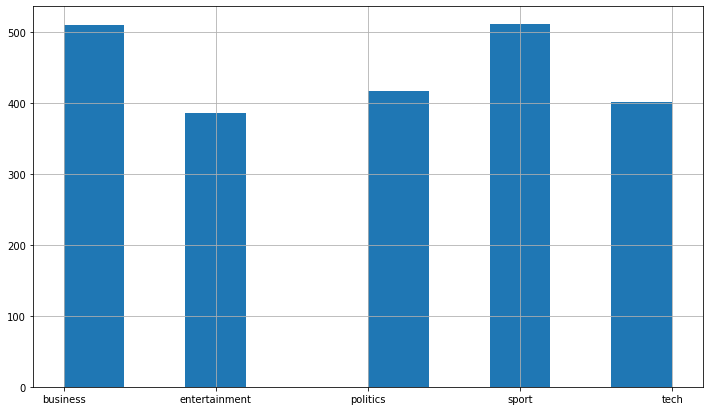

In [35]:
labels.hist(figsize = (12, 7))

In [48]:
inputs_train, inputs_test, Y_train, Y_test = train_test_split(inputs, labels, random_state = 33)

In [37]:
len(inputs_train)

1668

In [38]:
len(inputs_test)

557

In [15]:
vectorizer = CountVectorizer()

In [16]:
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)

In [17]:
X_train

<1668x26227 sparse matrix of type '<class 'numpy.int64'>'
	with 337965 stored elements in Compressed Sparse Row format>

In [18]:
(X_train != 0).sum()

337965

In [19]:
# what percentage of values are non-zero?
(X_train != 0).sum() / np.prod(X_train.shape)

0.0077255083110847654

In [20]:
model = MultinomialNB()
model.fit(X_train, Y_train)
print("train score: ", model.score(X_train, Y_train))
print("test score: ", model.score(X_test, Y_test))

train score:  0.9928057553956835
test score:  0.9748653500897666


### With stopwords

In [39]:
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print("train score: ", model.score(X_train, Y_train))
print("test score: ", model.score(X_test, Y_test))

train score:  0.9940047961630696
test score:  0.9748653500897666


### With lemmatization

In [42]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [43]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos = get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [44]:
vectorizer = CountVectorizer(tokenizer = LemmaTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print("train score: ", model.score(X_train, Y_train))
print("test score: ", model.score(X_test, Y_test))

c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score:  0.9934052757793765
test score:  0.9748653500897666


### With stemming

In [45]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [49]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print("train score:", model.score(X_train, Y_train))
print("test score:", model.score(X_test, Y_test))

c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9916067146282974
test score: 0.9748653500897666


In [50]:
def simple_tokenizer(s):
    return s.split()

In [51]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print("train score:", model.score(X_train, Y_train))
print("test score:", model.score(X_test, Y_test))


c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9964028776978417
test score: 0.9640933572710951
